In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

# Bounded Rationality in Macroeconomics
## The Cobweb model

This program replicates figure 2 of Evans-Honkapohja (2001).

### Professor: Alessandro Gobbi.

#### Julia implementation: Paulo Victor da Fonseca.

In [2]:
# Parametrization of the model:
α = -0.5; # key parameter for E-stability.
μ = 5.0;
δ = 1.0;
Σ = 0.5; # standard-deviation of η.
T = 200; # length of simulation
w0 = randn();      # Initial value of w.
w  = randn(1,T);   # Values of w_t.
η0 = Σ*randn();    # Initial value of η.
η  = Σ*randn(1,T); # Values of η.
ϕ0 = [1.; 2.];     # Initial values for ϕ. 

## Rational Expectations Equilibrium (REE) parameters:
$$ E_{t-1}p_t = (1-α)^{-1}μ + (1-α)^{-1}δ'w_{t-1}, \tag{1} $$
$$ E_{t-1}p_t = \bar{a} + \bar{b}'w_{t-1}, \tag{2} $$ 
$$ p_t = \bar{a} + \bar{b}'w_{t-1} + \eta_t, \quad \eta_t \sim \mathcal{N}(0,\Sigma) \tag{3} $$

In [3]:
abar = (1-α)^(-1)*μ;
bbar = (1-α)^(-1)*δ';

## Adaptive Learning
Actual law of motion (ALM) of the economy:
$$ p_t = (\mu + \alpha a_{t-1}) + (\delta + \alpha b_{t-1})'w_{t-1} + \eta_t. \tag{4} $$
Recursive least squares:
$$ R_t = R_{t-1} + \frac{1}{t}(z_{t-1}z_{t-1}' - R_{t-1}), \tag{5} $$
$$ \phi_t = \phi_{t-1} + \frac{1}{t}z_{t-1}(p_t - \phi_{t-1}'z_{t-1}), \tag{6} $$
where $\phi = (a,b')'$ and $z_t^{'} = (1,w_t')$.

In [4]:
function bounded_rationality(α,μ,δ,Σ,T,w0,w,η0,η,abar,bbar,ϕ0)    
# Preallocation
ϕ      = Array{Float64}(2,T);
p      = Array{Float64}(1,T);
pRE    = Array{Float64}(1,T);
# Initialization
M      = eye(2);
R0     = M;            # Set to long-run limit.
# Values of variables in t = 1.
zm     = [1 w0']';        
pRE[1] = abar + bbar'*w0 + η[1];
p[1]   = (μ + α*ϕ0[1]) + (δ + α*ϕ0[2])'*w0 + η[1];
R      = copy(R0);
ϕ[:,1] = ϕ0 + R\zm*(p[1]-ϕ0'*zm);
# Recursion
for t in 2:T
    zm     = [1 w[t-1]']';
    pRE[t] = abar + bbar'*w[t-1] + η[t];
    p[t]   = (μ + α*ϕ[1,t-1]) + (δ + α*ϕ[2,t-1])'*w[t-1] + η[t];
    
    Rnew   = R + (1/t)*(zm*zm' - R);
    ϕ[:,t] = ϕ[:,t-1] + (1/t)*(Rnew\zm*(p[t]-ϕ[:,t-1]'*zm));
    R      = Rnew;
end

return ϕ, p, pRE
end

bounded_rationality (generic function with 1 method)

## Simulate Dynamics ($\alpha = -0.5, \delta = 1.0$)

In [5]:
ϕ,p,pRE = bounded_rationality(α,μ,δ,Σ,T,w0,w,η0,η,abar,bbar,ϕ0);

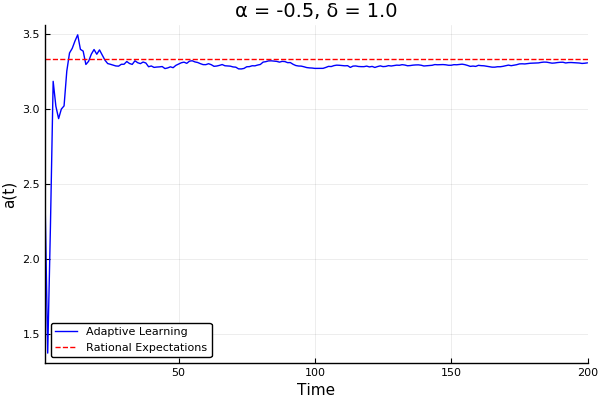

In [6]:
plot(ϕ[1,:],color="blue",lab="Adaptive Learning",ylab="a(t)",xlab="Time",title="α = -0.5, δ = 1.0")
plot!(abar*ones(T,1),color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

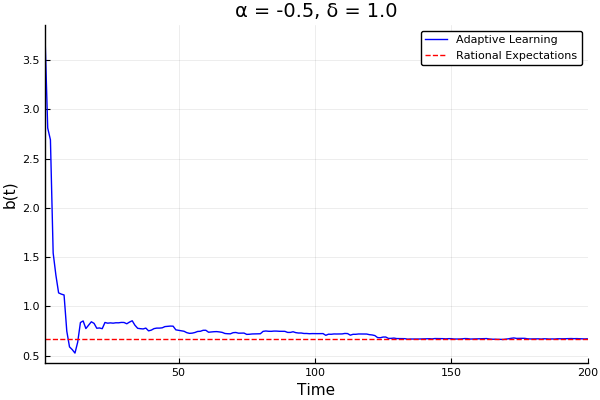

In [7]:
plot(ϕ[2,:],color="blue",lab="Adaptive Learning",ylab="b(t)",xlab="Time",title="α = -0.5, δ = 1.0")
plot!(bbar*ones(T,1),color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

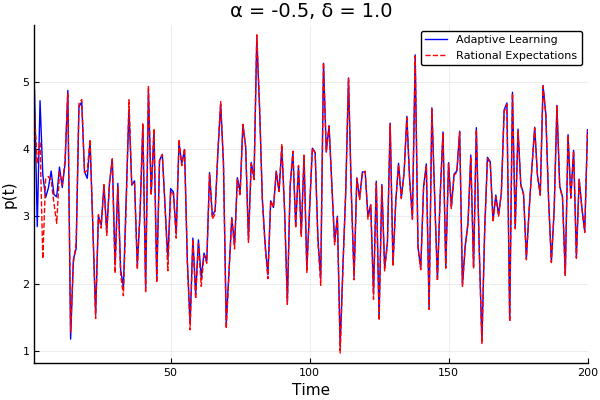

In [8]:
plot(p',color="blue",lab="Adaptive Learning",ylab="p(t)",xlab="Time",title="α = -0.5, δ = 1.0")
plot!(pRE',color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

## Simulate Dynamics ($\alpha = 0.5, \delta = 1.0$)

In [9]:
α = 0.5;
abar = (1-α)^(-1)*μ;
bbar = (1-α)^(-1)*δ';
ϕ,p,pRE = bounded_rationality(α,μ,δ,Σ,T,w0,w,η0,η,abar,bbar,ϕ0);

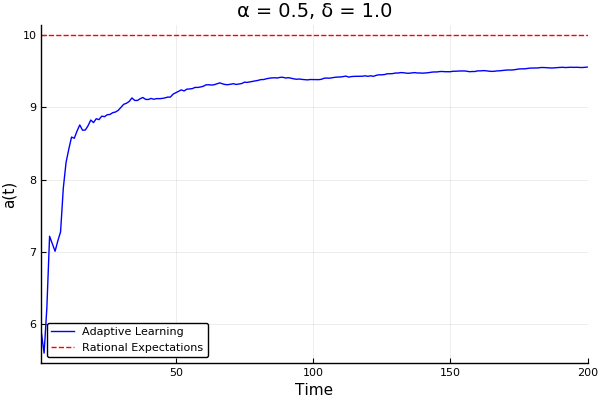

In [10]:
plot(ϕ[1,:],color="blue",lab="Adaptive Learning",ylab="a(t)",xlab="Time",title="α = 0.5, δ = 1.0")
plot!(abar*ones(T,1),color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

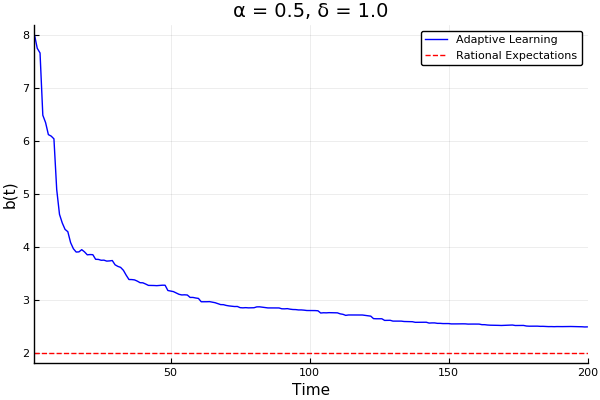

In [11]:
plot(ϕ[2,:],color="blue",lab="Adaptive Learning",ylab="b(t)",xlab="Time",title="α = 0.5, δ = 1.0")
plot!(bbar*ones(T,1),color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

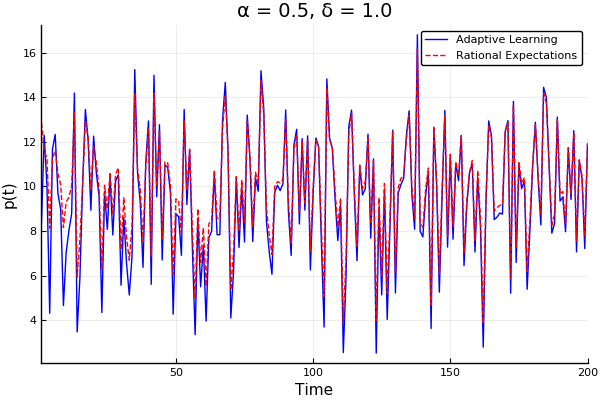

In [12]:
plot(p',color="blue",lab="Adaptive Learning",ylab="p(t)",xlab="Time",title="α = 0.5, δ = 1.0")
plot!(pRE',color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

## Simulate Dynamics ($\alpha = 0.9, \delta = 1.0$)

In [13]:
α = 0.9;
abar = (1-α)^(-1)*μ;
bbar = (1-α)^(-1)*δ';
ϕ0 = [abar;bbar];
ϕ,p,pRE = bounded_rationality(α,μ,δ,Σ,T,w0,w,η0,η,abar,bbar,ϕ0);

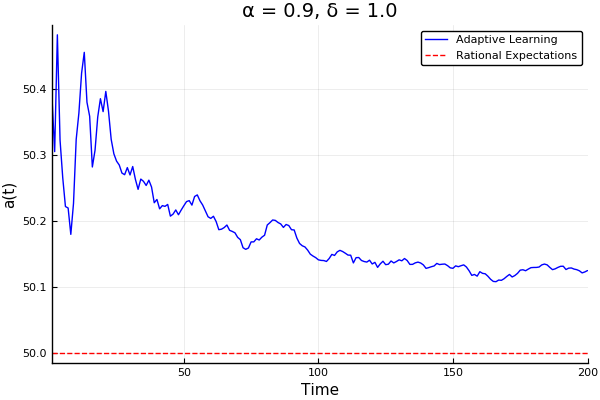

In [14]:
plot(ϕ[1,:],color="blue",lab="Adaptive Learning",ylab="a(t)",xlab="Time",title="α = 0.9, δ = 1.0")
plot!(abar*ones(T,1),color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

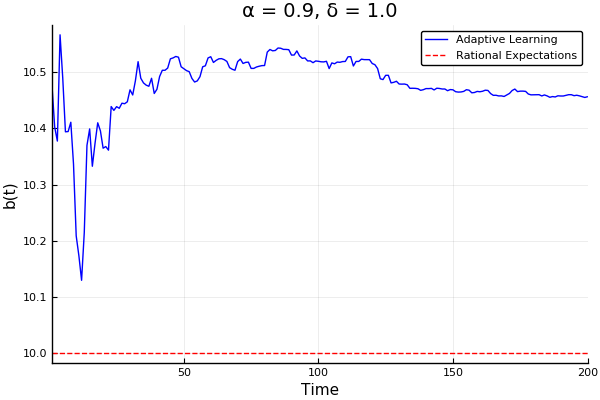

In [15]:
plot(ϕ[2,:],color="blue",lab="Adaptive Learning",ylab="b(t)",xlab="Time",title="α = 0.9, δ = 1.0")
plot!(bbar*ones(T,1),color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))

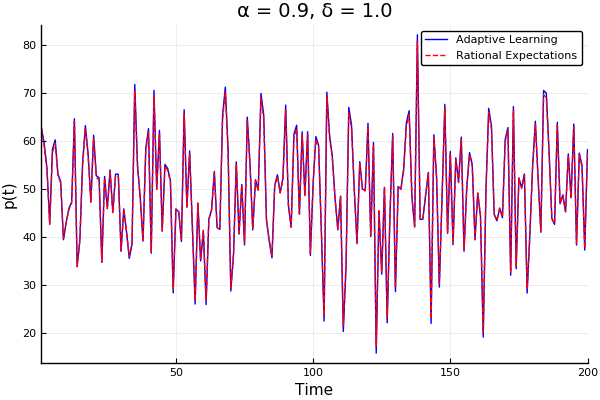

In [16]:
plot(p',color="blue",lab="Adaptive Learning",ylab="p(t)",xlab="Time",title="α = 0.9, δ = 1.0")
plot!(pRE',color="red",lab="Rational Expectations",line=:dash,xlims=(1,T))